# Task 3: To Explore Unsupervised Machine Learning

## Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

## Importing and understanding the data

In [2]:
df=pd.read_csv('Iris.csv', low_memory=False)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# checking the datatypes of the dataset

df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# checking if there is any null values

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# checking the shape of the dataset

df.shape

(150, 5)

## Visualising the data

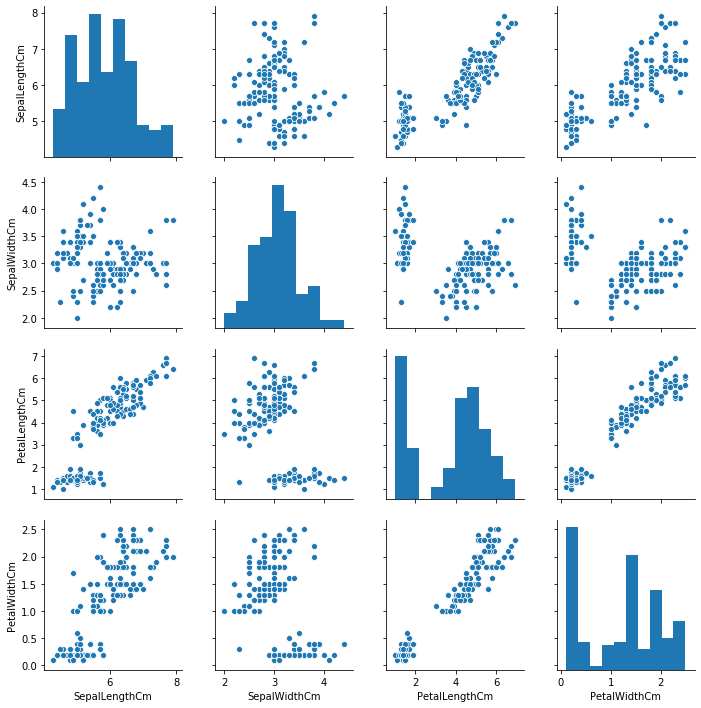

In [8]:
sns.pairplot(df);

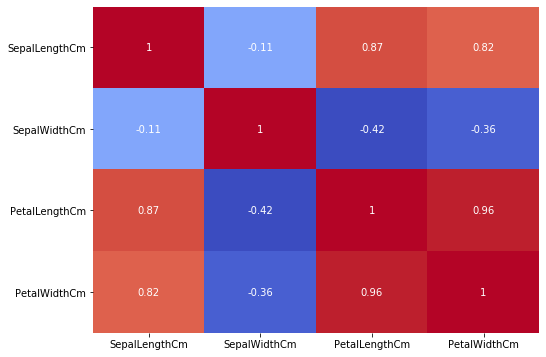

In [9]:
# plotting the correlation among the features

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=False)
ax.set_ylim([4,0])
ax.set_xlim([0,4])
ax.set_yticklabels(ax.get_xticklabels(), rotation=0);

## Finding the optimal number of clusters

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# assigning all the feature values to x, except the target values

x=df.drop(['Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


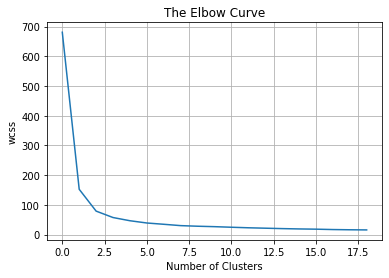

In [13]:
# creating an elbow curve with the no. of cluster within the range of (1-20)

wcss = []
n_clusters = range(1,20)

for cluster in n_clusters:
    kmeans = KMeans(n_clusters = cluster, max_iter = 300, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    
plt.plot(wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

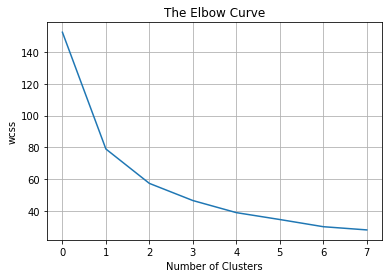

In [14]:
# creating an elbow curve with the no. of cluster within the range of (2-10)


wcss = []
n_clusters = range(2,10)

for cluster in n_clusters:
    kmeans = KMeans(n_clusters = cluster, max_iter = 300, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    
plt.plot(wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

## Building a clustering model

In [15]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
len(kmeans.labels_)

150

In [18]:
df['Predicted_Cluster'] = kmeans.labels_
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


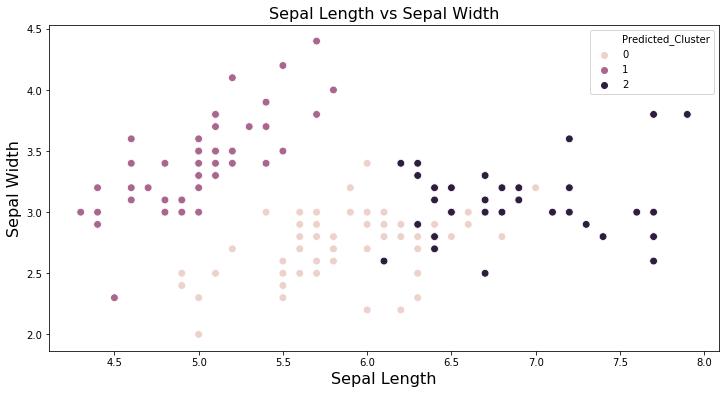

In [19]:
## Visualising the Predicted clusters

plt.figure(figsize=(12,6))
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:, 1], hue = df.iloc[:, 5], s= 60)
plt.title("Sepal Length vs Sepal Width", fontsize = 16)
plt.xlabel("Sepal Length", fontsize = 16)
plt.ylabel("Sepal Width", fontsize = 16);

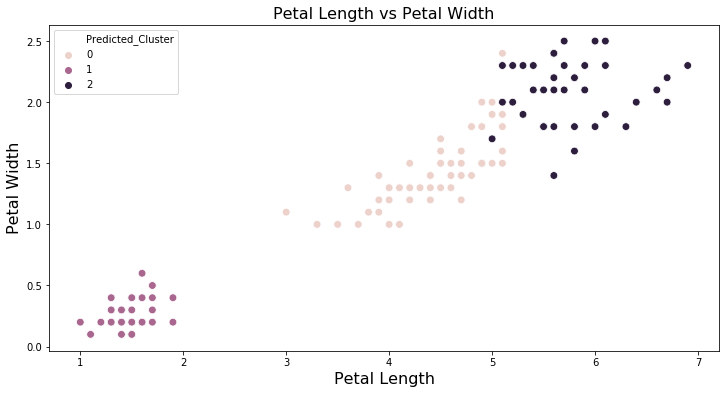

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df.iloc[:,2], y = df.iloc[:, 3], hue = df.iloc[:, 5], s= 60)
plt.title("Petal Length vs Petal Width", fontsize = 16)
plt.xlabel("Petal Length", fontsize = 16)
plt.ylabel("Petal Width", fontsize = 16);